<a href="https://colab.research.google.com/github/Vidzhel/data-analysis/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install basemap
!pip install pygad

import pygad
import numpy as np
import pandas as pd
import csv
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import sklearn.utils
import seaborn as sns
from sklearn.metrics import silhouette_score
# Euclidian distance
from scipy.spatial.distance import cdist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Vidzhel/data-analysis/main/eng-climate-summaries-All-2_2015.csv', sep=',',index_col='Stn_Name')

In [3]:
df.head(10)

,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
Stn_Name,,,,,,,,,,,,,,,,,,,,,
CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,0.0,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710
GALIANO NORTH,48.985,-123.573,BC,8.9,7.0,NaN,13.5,7.0,2.0,7.0,...,7.0,NaN,0.0,10.0,NaN,NaN,NaN,191.7,0.0,10130MN
MALAHAT,48.575,-123.530,BC,7.2,1.0,NaN,12.7,1.0,2.2,0.0,...,10.0,NaN,NaN,12.0,NaN,NaN,NaN,290.8,0.0,1014820
METCHOSIN,48.374,-123.561,BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,95.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,1015105


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1341 entries, CHEMAINUS to WABUSH A
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lat     1341 non-null   float64
 1   Long    1341 non-null   float64
 2   Prov    1341 non-null   object 
 3   Tm      1256 non-null   float64
 4   DwTm    1256 non-null   float64
 5   D       357 non-null    float64
 6   Tx      1260 non-null   float64
 7   DwTx    1260 non-null   float64
 8   Tn      1260 non-null   float64
 9   DwTn    1260 non-null   float64
 10  S       586 non-null    float64
 11  DwS     586 non-null    float64
 12  S%N     198 non-null    float64
 13  P       1227 non-null   float64
 14  DwP     1227 non-null   float64
 15  P%N     209 non-null    float64
 16  S_G     798 non-null    float64
 17  Pd      1227 non-null   float64
 18  BS      0 non-null      float64
 19  DwBS    0 non-null      float64
 20  BS%     0 non-null      float64
 21  HDD     1256 non-null   float6

In [5]:
df.describe()

,Lat,Long,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,...,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD
count,1341.000000,1341.000000,1256.000000,1256.000000,357.000000,1260.000000,1260.000000,1260.000000,1260.000000,586.000000,...,1227.000000,1227.000000,209.000000,798.000000,1227.000000,0.0,0.0,0.0,1256.000000,1256.0
mean,51.185221,-96.670827,-12.062341,2.186306,-2.768908,2.612302,1.814286,-26.322381,1.816667,35.219966,...,50.402363,2.612062,118.368421,31.325815,7.480033,NaN,NaN,NaN,773.277150,0.0
std,6.216434,23.285512,10.416366,4.903077,4.840769,8.855823,4.249613,12.573066,4.438321,39.575586,...,62.312551,4.889425,64.527522,33.799751,4.740601,NaN,NaN,NaN,311.119277,0.0
min,41.949000,-140.868000,-38.200000,0.000000,-12.000000,-29.800000,0.000000,-49.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,26.000000,0.0
25%,46.983000,-116.501000,-18.500000,0.000000,-7.100000,-3.500000,0.000000,-35.425000,0.000000,9.000000,...,13.200000,0.000000,75.000000,2.000000,4.000000,NaN,NaN,NaN,560.100000,0.0
50%,49.850000,-101.400000,-13.800000,0.000000,-4.600000,2.500000,0.000000,-29.100000,0.000000,25.000000,...,27.100000,0.000000,104.000000,26.000000,7.000000,NaN,NaN,NaN,813.500000,0.0
75%,53.283000,-73.750000,-5.600000,2.000000,2.700000,10.000000,1.000000,-21.700000,1.000000,49.875000,...,60.500000,3.000000,147.000000,45.000000,11.000000,NaN,NaN,NaN,988.000000,0.0
max,82.500000,-52.753000,9.600000,27.000000,7.800000,22.000000,27.000000,5.300000,27.000000,245.000000,...,516.800000,27.000000,400.000000,253.000000,28.000000,NaN,NaN,NaN,1523.400000,0.0


In [6]:
df = df.dropna(how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1341 entries, CHEMAINUS to WABUSH A
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lat     1341 non-null   float64
 1   Long    1341 non-null   float64
 2   Prov    1341 non-null   object 
 3   Tm      1256 non-null   float64
 4   DwTm    1256 non-null   float64
 5   D       357 non-null    float64
 6   Tx      1260 non-null   float64
 7   DwTx    1260 non-null   float64
 8   Tn      1260 non-null   float64
 9   DwTn    1260 non-null   float64
 10  S       586 non-null    float64
 11  DwS     586 non-null    float64
 12  S%N     198 non-null    float64
 13  P       1227 non-null   float64
 14  DwP     1227 non-null   float64
 15  P%N     209 non-null    float64
 16  S_G     798 non-null    float64
 17  Pd      1227 non-null   float64
 18  BS      0 non-null      float64
 19  DwBS    0 non-null      float64
 20  BS%     0 non-null      float64
 21  HDD     1256 non-null   float6

In [7]:
plt.figure(figsize=(14,10))
Long = [-140,-50] # Діапозон Довгота
Lat = [40,65] # Діапазон Широта

df = df[(df['Long'] > Long[0]) & (df['Long'] < Long[1])
& (df['Lat'] > Lat[0]) & (df['Lat'] < Lat[1])]

<Figure size 1400x1000 with 0 Axes>

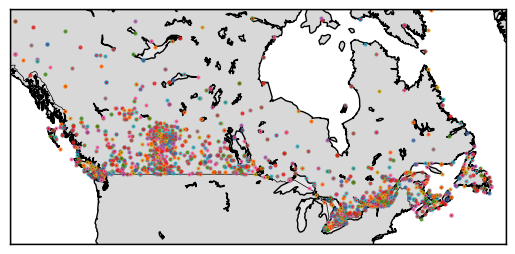

In [10]:
my_map = Basemap(projection='merc', resolution='l', area_thresh = 1000.0,
llcrnrlon = Long[0],
urcrnrlon = Long[1],
llcrnrlat = Lat[0],
urcrnrlat = Lat[1]
)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color='grey',alpha=0.3)
my_map.shadedrelief()

my_longs = df.Long.values
my_lats = df.Lat.values

X,Y = my_map(my_longs, my_lats)
df['xm'] = X
df['ym'] = Y

for (x,y) in zip(X,Y):
  my_map.plot(x,y,
    markerfacecolor=([1,0,0]),
    marker = 'o',
    markersize = 2,
    alpha = 0.75
  )

In [11]:
sklearn.utils.check_random_state(1000)
loc = [list(a) for a in zip(X,Y)]
loc = np.nan_to_num(loc)
scaler = StandardScaler()
loc = scaler.fit_transform(loc)

In [33]:
db = DBSCAN(eps=0.15, min_samples=10)
db.fit(loc)
labels = db.labels_ + 1

In [36]:
print(set(db.labels_))
set(labels)

{0, 1, 2, 3, 4, 5, -1}


{0, 1, 2, 3, 4, 5, 6}

In [25]:
df['DBSCAN_L_Clusters'] = labels
df[["Tx","Tm","DBSCAN_L_Clusters"]].head()

,Tx,Tm,DBSCAN_L_Clusters
Stn_Name,,,
CHEMAINUS,13.5,8.2,1
COWICHAN LAKE FORESTRY,15.0,7.0,1
LAKE COWICHAN,16.0,6.8,1
DISCOVERY ISLAND,12.5,NaN,1
DUNCAN KELVIN CREEK,14.5,7.7,1


In [94]:
def draw_map(labels, cluster_column):
  my_map = Basemap(projection='merc', resolution='l', area_thresh = 1000.0,
  llcrnrlon = Long[0],
  urcrnrlon = Long[1],
  llcrnrlat = Lat[0],
  urcrnrlat = Lat[1]
  )

  my_map.drawcoastlines()
  my_map.drawcountries()
  my_map.drawmapboundary()
  my_map.fillcontinents(color='grey',alpha=0.3)
  my_map.shadedrelief()


  colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, len(set(labels))))
  for index,row in df.iterrows():
    my_map.plot(row.xm, row.ym,
      markerfacecolor=colors[row[cluster_column]],
      marker = 'o',
      markersize = 5,
      alpha = 0.75
    )
  # Мітки кластерів
  for i in range(len(set(labels))):
    cluster = df[df[cluster_column] == i][["Tm","xm","ym",cluster_column]]
    xc = np.mean(cluster.xm)
    yc = np.mean(cluster.ym)
    #Отримайте середню температуру кластера
    Tavg = np.mean(cluster.Tm)
    #мітка кластера на карті
    plt.text(xc,yc,str(i),fontsize=30,color='red')
    # Вивести середні температури
    print ("Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm)))

Cluster 0, Avg Temp: -20.639583333333334
Cluster 1, Avg Temp: -5.538747553816047
Cluster 2, Avg Temp: 1.9526315789473685
Cluster 3, Avg Temp: -9.195652173913045
Cluster 4, Avg Temp: -19.86666666666667
Cluster 5, Avg Temp: -14.560731707317073
Cluster 6, Avg Temp: -22.42222222222222
Cluster 7, Avg Temp: nan
Cluster 8, Avg Temp: nan
Cluster 9, Avg Temp: nan


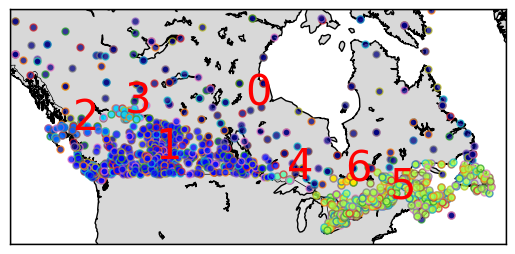

In [95]:
draw_map(labels, "DBSCAN_L_Clusters")

In [57]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
silhouette_coefficients = []

for k in range(2, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(loc)
   score = silhouette_score(loc, kmeans.labels_)
   silhouette_coefficients.append(score)

optimal_n_clusters = np.argmin(silhouette_coefficients) + 2
optimal_n_clusters

10

In [58]:
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0, n_init="auto").fit(loc)
labels = kmeans.labels_

In [59]:
print(set(kmeans.labels_))
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [60]:
df['KMEAN_L_Clusters'] = labels
df[["Tx","Tm","KMEAN_L_Clusters"]].head()

,Tx,Tm,KMEAN_L_Clusters
Stn_Name,,,
CHEMAINUS,13.5,8.2,5
COWICHAN LAKE FORESTRY,15.0,7.0,5
LAKE COWICHAN,16.0,6.8,5
DISCOVERY ISLAND,12.5,NaN,5
DUNCAN KELVIN CREEK,14.5,7.7,5


Cluster 0, Avg Temp: -20.45686274509804
Cluster 1, Avg Temp: -14.569078947368421
Cluster 2, Avg Temp: -7.704102564102563
Cluster 3, Avg Temp: -31.131249999999998
Cluster 4, Avg Temp: -18.788888888888888
Cluster 5, Avg Temp: 5.612280701754385
Cluster 6, Avg Temp: -14.978124999999999
Cluster 7, Avg Temp: -26.52916666666667
Cluster 8, Avg Temp: -8.320512820512821
Cluster 9, Avg Temp: -19.483673469387757


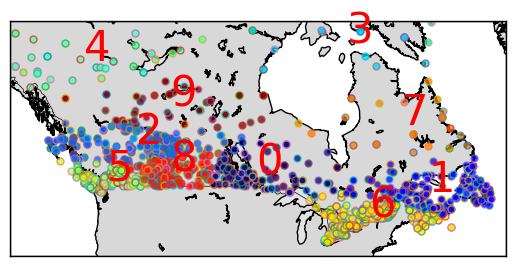

In [96]:
draw_map(labels, "KMEAN_L_Clusters")

In [110]:
k = 10

In [111]:
def kmeans_f(solution, solutionIndex):
    # Global vars
    global loc, k
    
    # Centroids
    centroids = np.array(solution).reshape(k, len(solution) // k)
    # Finding the distance between centroids and all data points
    distances = cdist(loc, centroids, 'euclidean')
    # Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances])
    
    # Calculate the sum square error
    error = []
    for idx in np.unique(points):
        temp_cent = loc[points == idx]
        distances = cdist(temp_cent, centroids[idx].reshape(1, -1), 'euclidean')
        error.append(distances.sum())
    # Return result
    return np.sum(error)

# Fitness function
def fitnessFunction(_, solution, solutionIndex):
    outputExpected = kmeans_f(solution, solutionIndex)
    fitnessValue = 1 / (outputExpected + 0.000001)
    return fitnessValue

In [113]:
# Prepare the parameters
# Generation
numberGeneration = 100       # Number of generation
numberParentsMating = 5
solutionPerPopulation = 50     # Chromosomes in each generation
parents = -1
# Genes
numberGenes = k * loc.shape[1]   # Number of genes in each chromosome
geneType = float               # Data type in each gene
# Range of values
minValue = 0                   # Minimum value of solution
maxValue = 8                   # Maximum value of solution
# Selection
selectionType = 'sss'          # Steady state selection
# Cross over
crossoverType = 'single_point' # Cross over with single point method
crossoverRate = 0.25           # Cross over rate (Pc)
# Mutation
mutationType = 'random'        # Mutation using random method
mutationReplacement = True     # Replace gene with random value
mutationMin = 0
mutationMax = 8
mutationRate = 10              # Mutation rate (Pm)

# Set the parameters into Genetic Algorithm function
geneticAlgorithm = pygad.GA(
    # Number of generation
    num_generations = numberGeneration,
    
    # Number of parents mating
    num_parents_mating = numberParentsMating,
    
    # Number of gene each chromosome
    num_genes = numberGenes,
    
    # Gene type
    gene_type = geneType,
    
    # Fitness function
    fitness_func = fitnessFunction,
    
    # Number solution per population
    sol_per_pop = solutionPerPopulation,
    
    # Min and max value
    init_range_low = minValue,
    init_range_high = maxValue,
    
    # Selection
    parent_selection_type = selectionType,
    keep_parents = parents,
    
    # Cross over
    crossover_type = crossoverType,
    crossover_probability = crossoverRate,
    
    # Mutation
    mutation_type = mutationType,
    mutation_by_replacement = mutationReplacement,
    random_mutation_min_val = mutationMin,
    random_mutation_max_val = mutationMax,
    mutation_percent_genes = mutationRate,
    
    # Solutions
    save_solutions = True,
    save_best_solutions = True,
    suppress_warnings = True
)

In [114]:
# Run the Genetic Algorithm
geneticAlgorithm.run()

In [115]:
# Solution
solution, solutionFitness, solutionIndex = geneticAlgorithm.best_solution()
centroids = solution.reshape(k, len(solution) // k)
print('Parameters of the best solution    : \n{centroids}'.format(centroids = centroids))
print('Fitness value of the best solution : {solutionFitness}'.format(solutionFitness = round(solutionFitness, ndigits = 2)))
print('Index of the best solution         : {solutionIndex}'.format(solutionIndex = solutionIndex))

# Finding the distance between centroids and all data points
distances = cdist(loc, centroids, 'euclidean')
# Centroid with the minimum Distance
points = np.array([np.argmin(i) for i in distances])
df["GENERIC_L_Clusters"] = points

Parameters of the best solution    : 
[[1.60389939 0.01136393]
 [0.04790316 3.59319851]
 [1.56995331 1.4236545 ]
 [0.36965468 2.0465749 ]
 [0.00438502 0.05697564]
 [0.88602409 0.04559642]
 [0.01755694 0.8193494 ]
 [1.31188985 0.63795425]
 [0.01794698 2.32014184]
 [1.22100666 3.79659428]]
Fitness value of the best solution : 0.0
Index of the best solution         : 0


Cluster 0, Avg Temp: -11.218309859154928
Cluster 1, Avg Temp: -26.005555555555556
Cluster 2, Avg Temp: -25.06
Cluster 3, Avg Temp: -30.666666666666668
Cluster 4, Avg Temp: -4.366746411483254
Cluster 5, Avg Temp: -16.792857142857144
Cluster 6, Avg Temp: -10.291705069124426
Cluster 7, Avg Temp: -26.4
Cluster 8, Avg Temp: -19.234615384615385
Cluster 9, Avg Temp: -28.824999999999996


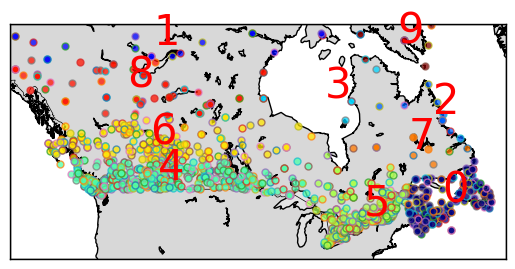

In [116]:
labels = range(k)
draw_map(labels, "GENERIC_L_Clusters")

In [117]:
round(silhouette_score(loc, points), 2)

0.36